Email Spam Classification using KNN and SVM

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
# Load Dataset
df = pd.read_csv('emails.csv')  # Replace with your dataset filename
print('Dataset Loaded Successfully')
print(df.head())

Dataset Loaded Successfully
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]


In [23]:
# Data Preprocessing
print('Missing values in each column:')
print(df.isnull().sum())
df = df.dropna()
label_encoder = LabelEncoder()
df['spam'] = label_encoder.fit_transform(df['spam'])
print('Label Encoding done (0 = Not Spam, 1 = Spam)')

Missing values in each column:
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64
Label Encoding done (0 = Not Spam, 1 = Spam)


In [24]:
# Text Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)

X = df.drop(['Email No.', 'spam'], axis=1)
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Data Split Done')

Data Split Done


In [25]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('KNN Model Trained')

KNN Model Trained


In [26]:
# Support Vector Machine
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('SVM Model Trained')

SVM Model Trained


In [27]:
# Model Evaluation
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    print(f'{name} Model Performance:')
    print(f'Accuracy: {acc*100:.2f}%')
    print('Confusion Matrix: ', cm)
    print('Classification Report:', classification_report(y_true, y_pred))
    return acc

acc_knn = evaluate_model('KNN', y_test, y_pred_knn)
acc_svm = evaluate_model('SVM', y_test, y_pred_svm)

KNN Model Performance:
Accuracy: 98.94%
Confusion Matrix:  [[1016    8]
 [   3    8]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1024
           1       0.50      0.73      0.59        11

    accuracy                           0.99      1035
   macro avg       0.75      0.86      0.79      1035
weighted avg       0.99      0.99      0.99      1035

SVM Model Performance:
Accuracy: 99.23%
Confusion Matrix:  [[1018    6]
 [   2    9]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1024
           1       0.60      0.82      0.69        11

    accuracy                           0.99      1035
   macro avg       0.80      0.91      0.84      1035
weighted avg       0.99      0.99      0.99      1035



Model Accuracy Comparison:
  Model   Accuracy
0   KNN  98.937198
1   SVM  99.227053


/tmp/ipython-input-1782370318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=comparison, palette='mako')


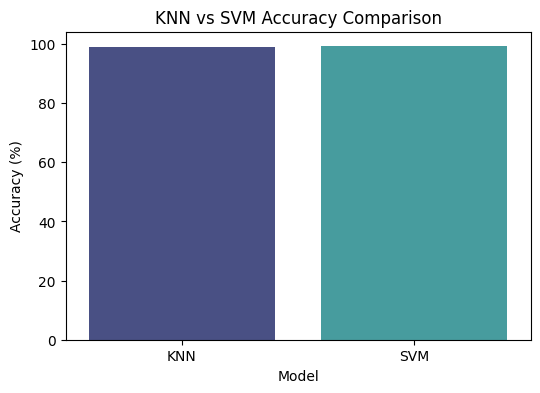

In [28]:
# Comparison
comparison = pd.DataFrame({
    'Model': ['KNN', 'SVM'],
    'Accuracy': [acc_knn * 100, acc_svm * 100]
})
print('Model Accuracy Comparison:')
print(comparison)
plt.figure(figsize=(6,4))
sns.barplot(x='Model', y='Accuracy', data=comparison, palette='mako')
plt.title('KNN vs SVM Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()